# Exploration of the data

In [34]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Loading the train and test data
X_train = np.load('../data/X_train.npy')
X_test = np.load('../data/X_test.npy')

y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [35]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16841, 1, 128, 128)
Shape of y_train: (16841,)

Shape of X_test: (8420, 1, 128, 128)
Shape of y_test: (8420,)


From the code above we can see that the train:test data is split into ratio 2:1 (16841 samples in train and 8420 in sample in test).

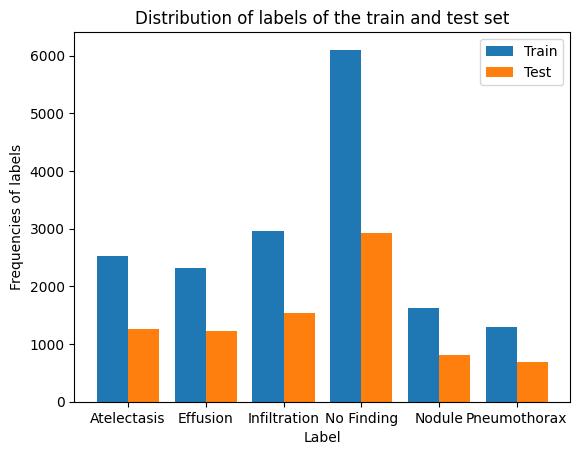

In [48]:
labels = ['Atelectasis', 'Effusion', 'Infiltration', 'No Finding', 'Nodule', 'Pneumothorax']

# get the labels and the frequency of each label in the train, test data
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

X_axis = np.arange(len(unique_train))

plt.bar(X_axis - 0.2, counts_train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, counts_test, 0.4, label = 'Test')

plt.xticks(X_axis, labels)
plt.xlabel("Label")
plt.ylabel("Frequencies of labels")
plt.title("Distribution of labels of the train and test set")
plt.legend()
plt.show()

In [54]:
print("Train data:")
for l, f in zip(labels, counts_train):
    print(f"Label: {l} - Frequency: {f}")

print("")
print("Test data:")
for l, f in zip(labels, counts_test):
    print(f"Label: {l} - Frequency: {f}")


Train data:
Label: Atelectasis - Frequency: 2521
Label: Effusion - Frequency: 2318
Label: Infiltration - Frequency: 2964
Label: No Finding - Frequency: 6103
Label: Nodule - Frequency: 1633
Label: Pneumothorax - Frequency: 1302

Test data:
Label: Atelectasis - Frequency: 1254
Label: Effusion - Frequency: 1218
Label: Infiltration - Frequency: 1537
Label: No Finding - Frequency: 2924
Label: Nodule - Frequency: 806
Label: Pneumothorax - Frequency: 681


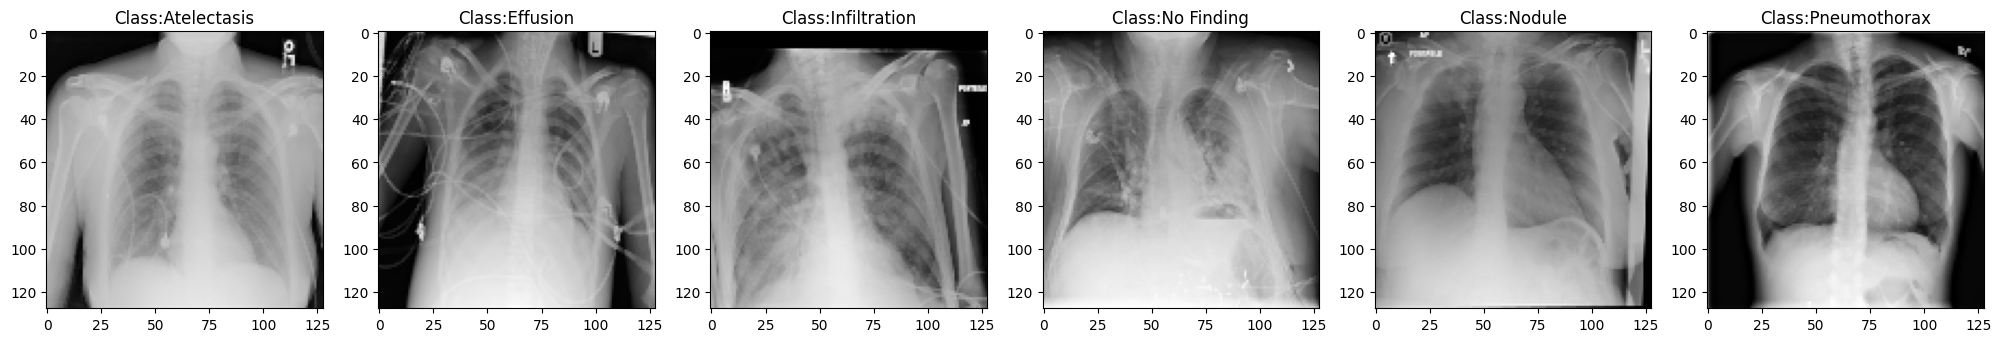

In [57]:
unique_labels = np.arange(len(unique_train))
fig, ax = plt.subplots(ncols=len(unique_labels), figsize=[25,5])

for k, label in enumerate(unique_labels):
  index = list(y_test).index(label)
  ax[k].imshow(X_test[index].reshape(128,128), cmap='gray')
  ax[k].set_title(f'Class:{labels[y_test[index]]}')